# Cats and Dogs Classification

In [29]:
import tensorflow as tf
import os
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
# Define dataset paths
train_dir = "training_set"
test_dir = "test_set"

In [53]:
# Helper function to load images from folders
def load_images_and_labels(base_dir):
    images = []
    labels = []
    class_names = os.listdir(base_dir)  # ['cats', 'dogs']
    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(base_dir, class_name)
        for filename in os.listdir(class_folder):
            file_path = os.path.join(class_folder, filename)
            try:
                img = Image.open(file_path).resize((150, 150))  # Resize to 150x150
                img = np.array(img) / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(label)
            except:
                print(f"Error loading image: {file_path}")
    return np.array(images), np.array(labels)

In [54]:
# Load training data
X_train, y_train = load_images_and_labels(train_dir)

Error loading image: training_set\cats\_DS_Store
Error loading image: training_set\dogs\_DS_Store


In [55]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [56]:
# Load test data
X_test, y_test = load_images_and_labels(test_dir)

Error loading image: test_set\cats\_DS_Store
Error loading image: test_set\dogs\_DS_Store


In [57]:
# One-hot encode labels (optional for binary classification)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [59]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train,epochs=10,batch_size=32,validation_data=(X_val, y_val))

C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 75s 366ms/step - accuracy: 0.5195 - loss: 0.8085 - val_accuracy: 0.6021 - val_loss: 0.6705
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 71s 351ms/step - accuracy: 0.6353 - loss: 0.6469 - val_accuracy: 0.6633 - val_loss: 0.6062
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 71s 354ms/step - accuracy: 0.6971 - loss: 0.5774 - val_accuracy: 0.6808 - val_loss: 0.5952
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 69s 344ms/step - accuracy: 0.7631 - loss: 0.5009 - val_accuracy: 0.6858 - val_loss: 0.6234
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 74s 369ms/step - accuracy: 0.8063 - loss: 0.4010 - val_accuracy: 0.7314 - val_loss: 0.5792
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 70s 346ms/step - accuracy: 0.8867 - loss: 0.2663 - val_accuracy: 0.7414 - val_loss: 0.6632
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 70s 350ms/step - accuracy: 0.9511 - loss: 0.1324 - val_accuracy: 0.7402 - val_loss: 0.8247
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 70s 347ms/step - accuracy: 0.9775 - loss: 0

In [60]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,104,072 (217.83 MB)

 Trainable params: 19,034,690 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,069,382 (145.22 MB)

In [61]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.7043 - loss: 1.6353
Test Accuracy: 0.74


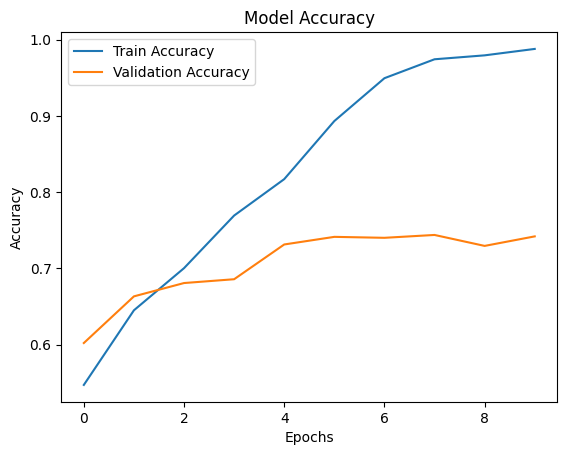

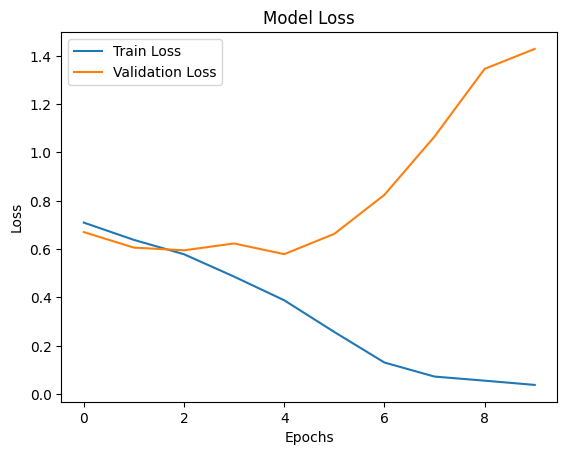

In [62]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Using Data Generator

In [30]:
# Define image size and batch size
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [32]:
# Use ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of training data used for validation
)

# Training generator (80% of data)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'  # Use the training split
)

# Validation generator (20% of data)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'  # Use the validation split
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [35]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (7, 7), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# Train the model
EPOCHS = 100
# Train the model with validation data
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100


C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5040 - loss: 0.7212 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 709ms/step - accuracy: 0.4956 - loss: 0.6933 - val_accuracy: 1.0000 - val_loss: 0.6877
Epoch 3/100


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 590ms/step - accuracy: 0.4944 - loss: 0.6936 - val_accuracy: 0.0000e+00 - val_loss: 0.6998
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 609ms/step - accuracy: 0.4971 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.4688 - loss: 0.6933 - val_accuracy: 0.0000e+00 - val_loss: 0.6962
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 639ms/step - accuracy: 0.5030 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 482ms/step - accuracy: 0.4922 - loss: 0.6936 - val_accuracy: 0.0000e+00 - val_loss: 0.7005
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.4688 - loss: 0.6936 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 471ms/step - accuracy: 0.4928 -

In [39]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Evaluate the model
eval_result = model.evaluate(test_generator)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

Found 2023 images belonging to 2 classes.
 1/64 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.4375 - loss: 0.6940

C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 516ms/step - accuracy: 0.4917 - loss: 0.6933
Test Loss: 0.693172812461853, Test Accuracy: 0.49975284934043884


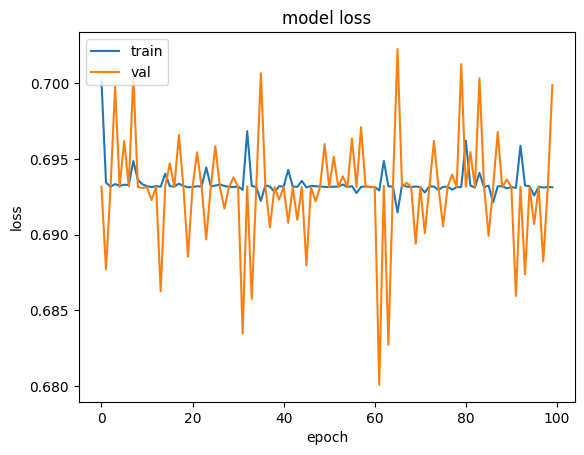

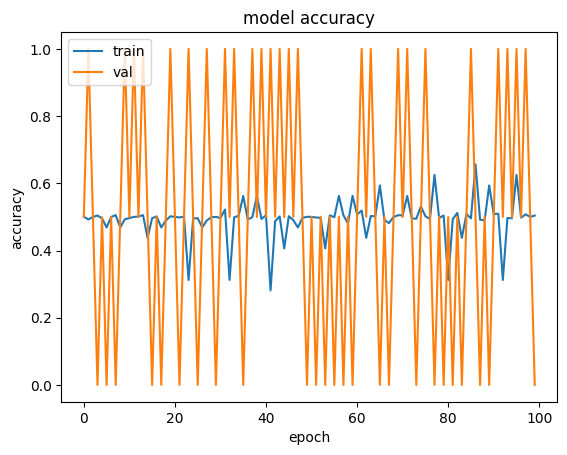

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Less Data Generator Parameters

In [41]:
# Set up ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,    # Random shear transformations
    zoom_range=0.2,     # Random zoom
    horizontal_flip=True,  # Allow random horizontal flipping
    validation_split=0.2  # Reserve 20% of data for validation
)

# Load data using ImageDataGenerator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Training subset
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Validation subset
)

# Separate test data (no validation split here)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 98s 477ms/step - accuracy: 0.5241 - loss: 0.6998 - val_accuracy: 0.5703 - val_loss: 0.6830
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 142s 702ms/step - accuracy: 0.5699 - loss: 0.6727 - val_accuracy: 0.6146 - val_loss: 0.6514
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 150s 736ms/step - accuracy: 0.6357 - loss: 0.6331 - val_accuracy: 0.6796 - val_loss: 0.6144
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 93s 459ms/step - accuracy: 0.6682 - loss: 0.5997 - val_accuracy: 0.6846 - val_loss: 0.5808
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 103s 506ms/step - accuracy: 0.7191 - loss: 0.5490 - val_accuracy: 0.7146 - val_loss: 0.5585
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 103s 507ms/step - accuracy: 0.7402 - loss: 0.5249 - val_accuracy: 0.7870 - val_loss: 0.4752
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 101s 498ms/step - accuracy: 0.7601 - loss: 0.4851 - val_accuracy: 0.7883 - val_loss: 0.4579
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 104s 511ms/step - accuracy: 0.7934 - l

In [42]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 583ms/step - accuracy: 0.7924 - loss: 0.4640
Test Accuracy: 0.81


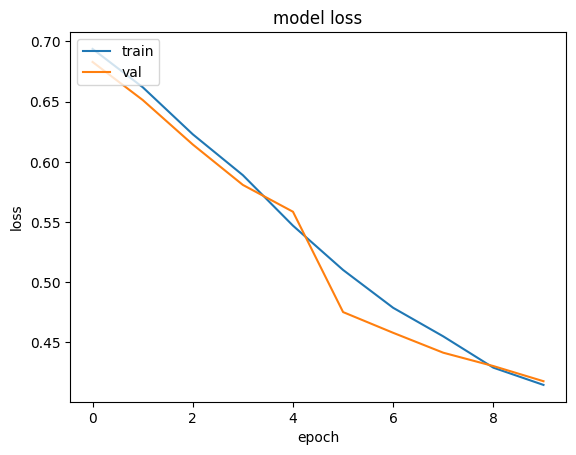

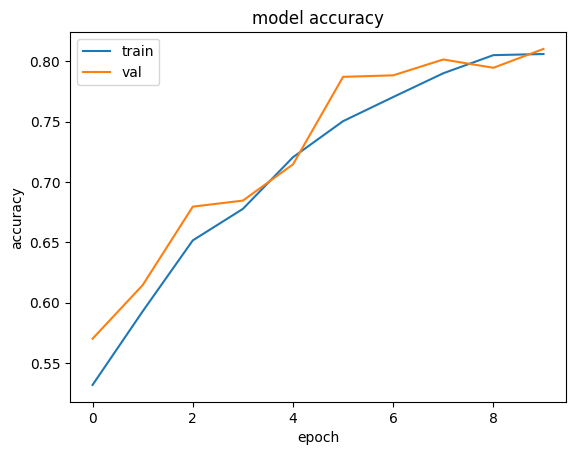

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()